In [45]:
from federal_scrapper import FederalScrapper as FS
federal_scrapper = FS(browser="firefox", headless=True)
federal_scrapper.run()

In [38]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
import re
from datetime import datetime

# Download stopwords (first time only)
nltk.download('stopwords')

# Define the path to the folder containing the .txt files
folder_path = r'/home/neto/projects/fedrev-speeches/data'

# Define the time ranges for filtering
time_ranges = [
    (2020, 2021),   # Files from the year 2016
    (2022, 2023),   # Files from the year 2017
    (2022, 2023),   # Files from the year 2017
    (2022, 2023),   # Files from the year 2017
]

color_palettes = [
      'Blues',    # Blue for 2016
    'Greens',   # Green for 2017
    'Reds',     # Red for 2022
    'Purples'   # Purple for 2023 
]

# Get the set of stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Prepare a dictionary to store text for each time range
texts_by_range = {f"{start}-{end}": "" for start, end in time_ranges}

# Read all the .txt files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        # Extract the date from the filename (assuming the date format is MM_DD_YYYY)
        match = re.search(r'_(\d{2})_(\d{2})_(\d{4})', filename)
        if match:
            file_date = datetime.strptime(match.group(0)[1:], "%m_%d_%Y")  # Remove the leading "_"
            file_year = file_date.year
            
            # Check which time range the file falls into and add its text to the corresponding range
            for (start, end) in time_ranges:
                if start <= file_year <= end:
                    file_path = os.path.join(folder_path, filename)
                    with open(file_path, 'r', encoding='utf-8') as file:
                        texts_by_range[f"{start}-{end}"] += file.read() + ' '
                    break

[nltk_data] Downloading package stopwords to /home/neto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


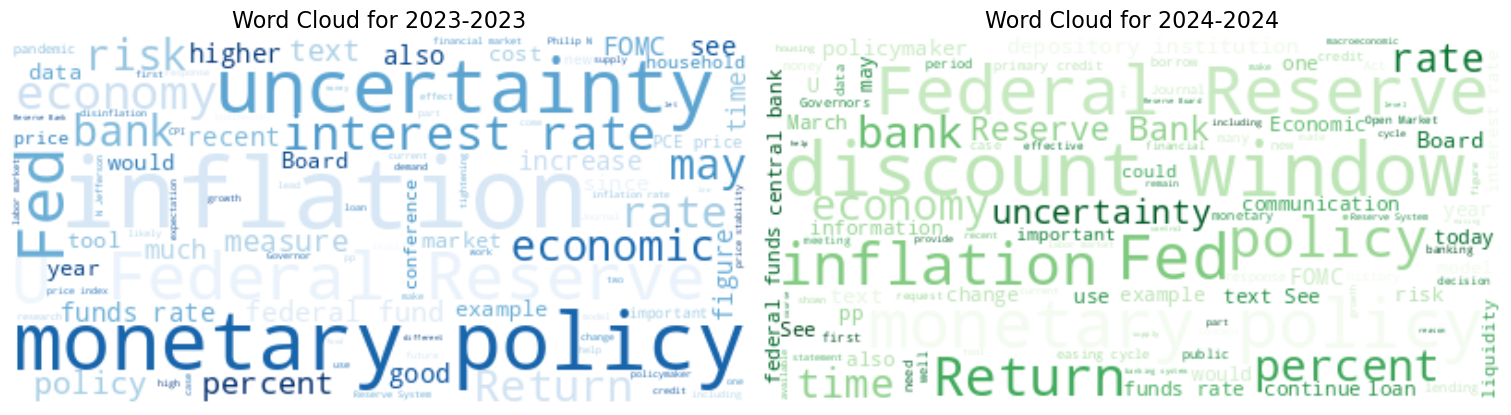

In [44]:
# Create a word cloud for each time range
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 8), constrained_layout=True)  # nxm grid for word clouds
axes = axes.flatten()

for idx, (time_range, text) in enumerate(texts_by_range.items()):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', colormap=color_palettes[idx]).generate(text)
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].axis('off')  # Hide the axes
    axes[idx].set_title(f"Word Cloud for {time_range}", fontsize=16)

plt.show()